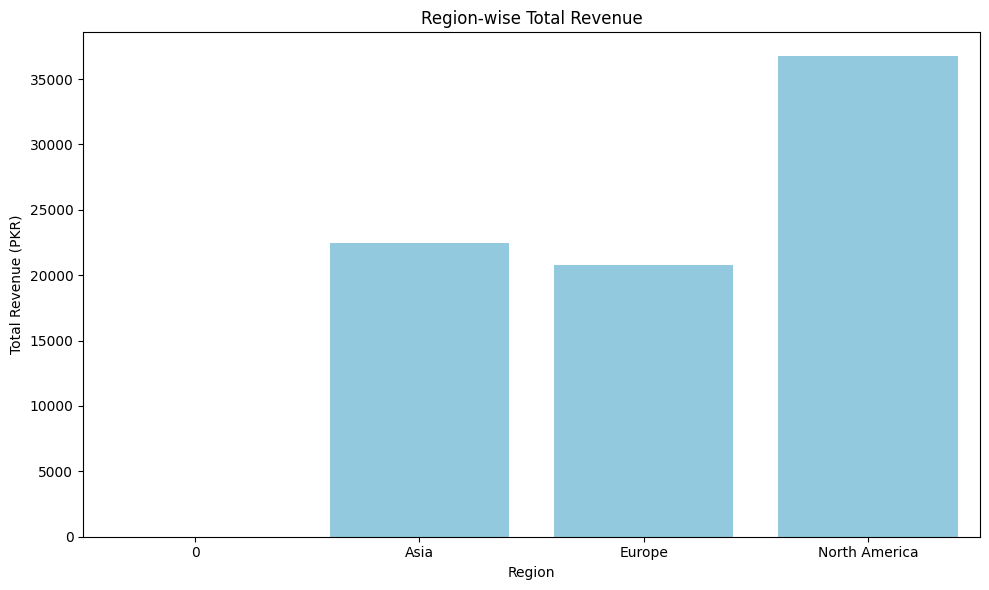

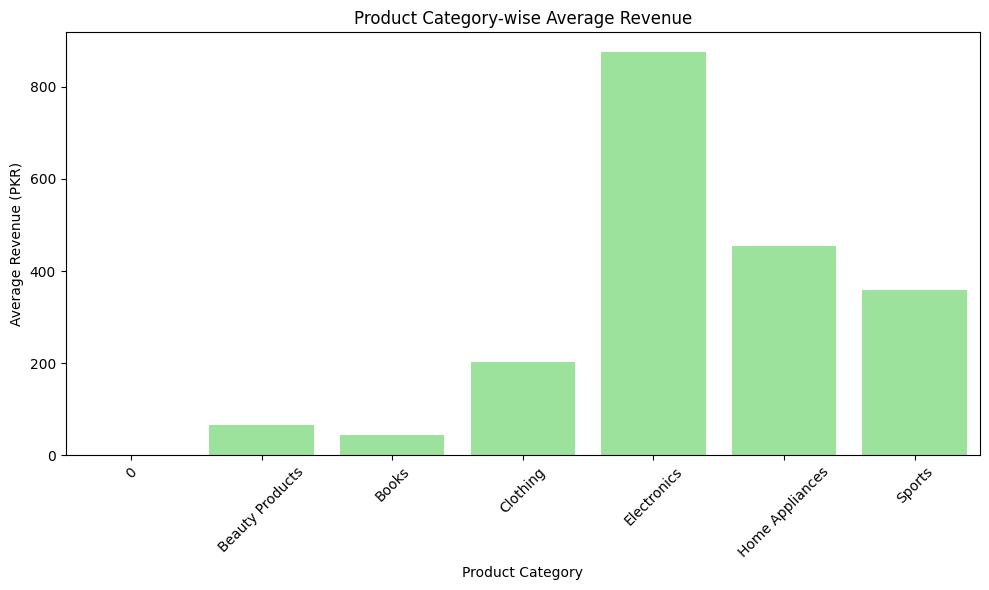

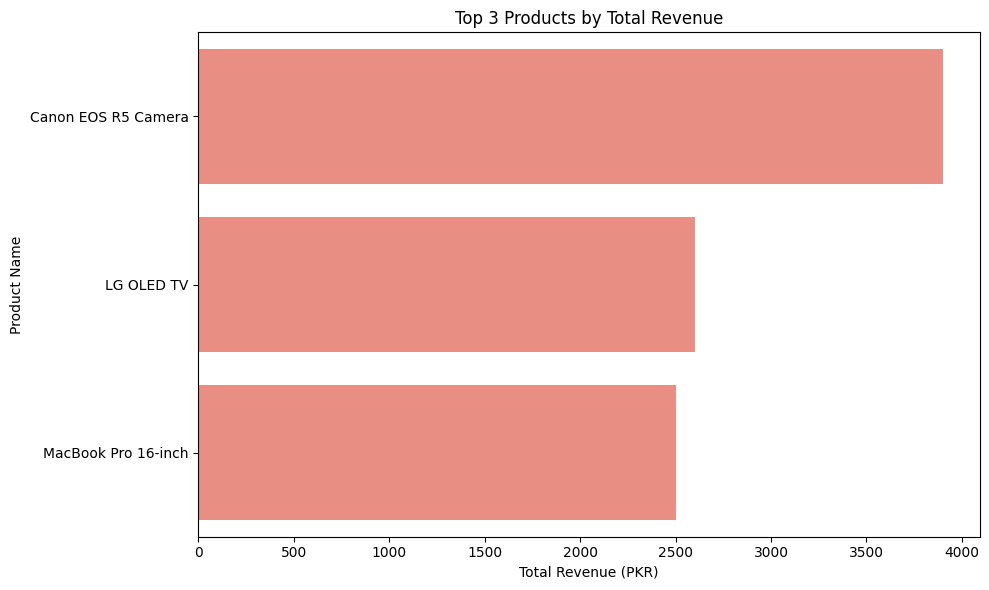

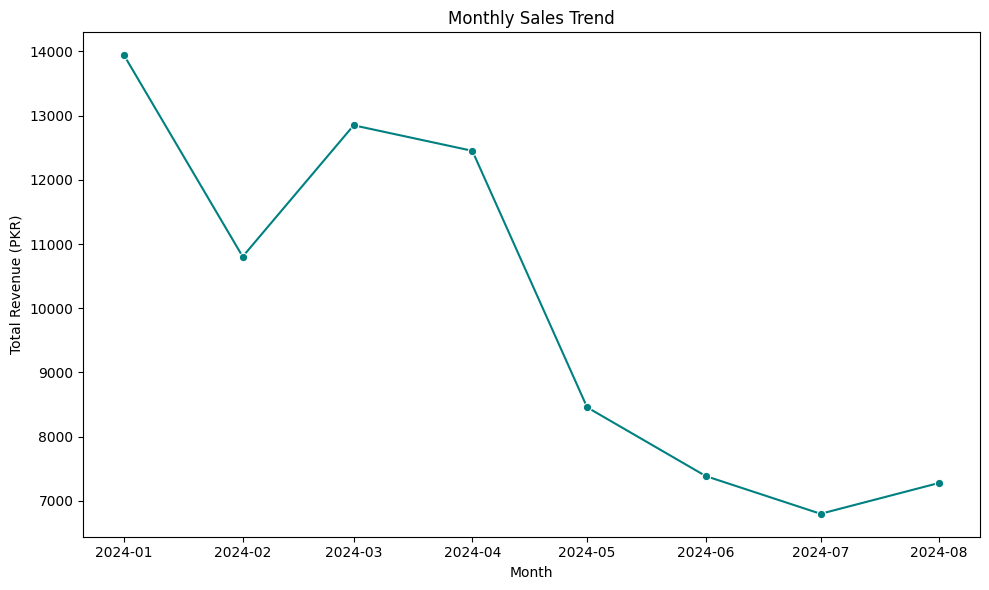

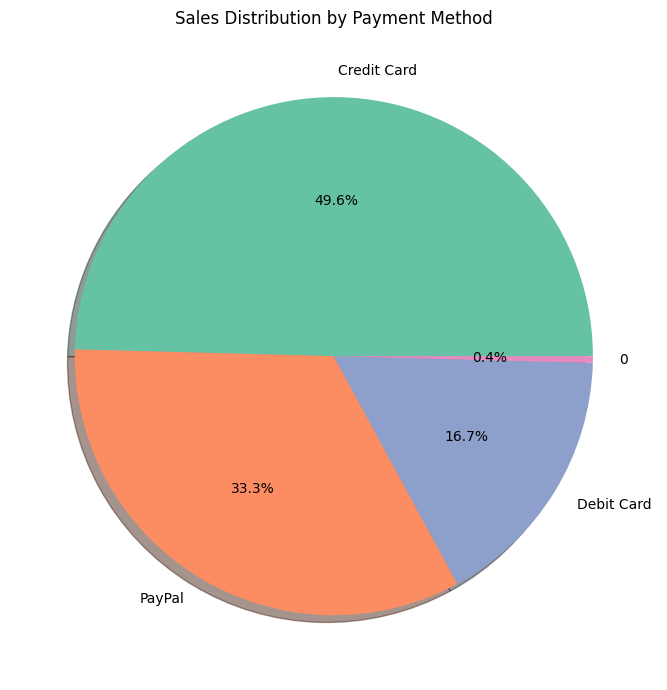

In [ ]:
"""
Sales Data Visualization using Pandas, Seaborn & Matplotlib
Author: Muzammal Hussain | AI Developer | Pakistan
"""

# 1. Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Load Dataset
df = pd.read_csv("sales_data.csv")


# 3. Data Cleaning

# Filling missing values with 0
df.fillna(0, inplace=True)

# Converting "Date" column into datetime format
# errors="coerce" means invalid dates will become NaT instead of crashing the program
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


# 4. Grouping with Pandas

# (a) Region-wise total revenue
region_sales = df.groupby("Region")["Total Revenue"].sum().reset_index()

# (b) Product Category-wise average revenue
category_sales = (
    df.groupby("Product Category")["Total Revenue"]
    .mean()
    .reset_index()
    .rename(columns={"Total Revenue": "Average Revenue"})
)

# (c) Top 3 products by total revenue
top_products = (
    df.groupby("Product Name")["Total Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(3)
    .reset_index()
)

# (d) Monthly total revenue
monthly_sales = (
    df.groupby(df["Date"].dt.to_period("M"))["Total Revenue"].sum().reset_index()
)
monthly_sales["Date"] = monthly_sales["Date"].dt.to_timestamp()


# 5. Data Visualization

# (a) Region-wise Total Revenue (Bar Plot)
plt.figure(figsize=(10,6))
sns.barplot(x="Region", y="Total Revenue", data=region_sales, color="skyblue")
plt.title("Region-wise Total Revenue")
plt.xlabel("Region")
plt.ylabel("Total Revenue (PKR)")
plt.tight_layout()
plt.show()

# (b) Product Category-wise Average Revenue (Bar Plot)
plt.figure(figsize=(10,6))
sns.barplot(x="Product Category", y="Average Revenue", data=category_sales, color="lightgreen")
plt.title("Product Category-wise Average Revenue")
plt.xlabel("Product Category")
plt.ylabel("Average Revenue (PKR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# (c) Top 3 Products by Total Revenue (Horizontal Bar Plot)
plt.figure(figsize=(10,6))
sns.barplot(y="Product Name", x="Total Revenue", data=top_products, color="salmon")
plt.title("Top 3 Products by Total Revenue")
plt.xlabel("Total Revenue (PKR)")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

# (d) Monthly Sales Trend (Line Plot)
plt.figure(figsize=(10,6))
sns.lineplot(x="Date", y="Total Revenue", data=monthly_sales, marker="o", color="teal")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue (PKR)")
plt.tight_layout()
plt.show()

# (e) Sales Distribution by Payment Method (Pie Chart)
plt.figure(figsize=(7,7))
payment_counts = df["Payment Method"].value_counts()
plt.pie(
    payment_counts,
    labels=payment_counts.index,
    autopct="%1.1f%%",
    colors=sns.color_palette("Set2"),
    shadow=True
)
plt.title("Sales Distribution by Payment Method")
plt.tight_layout()
plt.show()
